<h1>Amortizacija u pythonu</h1>

In [1]:
import platform

In [2]:
platform.platform()

'Linux-4.19.6-1-MANJARO-x86_64-with-arch-Manjaro-Linux'

In [3]:
platform.python_version()

'3.7.1'

In [4]:
import matplotlib

In [5]:
matplotlib.__version__

'3.0.2'

In [6]:
from pylab import *

In [7]:
import numpy as np

In [8]:
np.__version__

'1.15.4'

<h2>Implementacija funkcija</h2>

In [9]:
from ipy_table import *

<p style='padding-bottom:5pt;'>Funkcija <code>amortizacija</code> daje amortizacijsku osnovicu za zadanu vremensku metodu amortizacije. Funkcija ima sljedeće parametre:</p>
<ul>
<li style='margin-bottom: 10px;line-height:20px;'><code>C</code> - početna vrijednost dobra</code></li>
<li style='margin-bottom: 10px;line-height:25px;'><code>S</code> - otpisna vrijednost dobra</li>
<li style='margin-bottom: 10px;line-height:25px;'><code>n</code> - broj godina trajanja amortizacije</li>
<li style='margin-bottom: 10px;line-height:25px;'><code>metoda</code> - vrsta vremenske amortizacije. Po defaultu je stavljeno <code>metoda='LIN'</code> što znači da se radi o linearnoj amortizaciji. Ako stavimo <code>metoda='SZ'</code>, tada se radi amortizacija metodom sume znamenaka. Ako stavimo <code>metoda='KP'</code>, tada se radi amortizacija metodom konstantnog postotka.</li>
<li style='margin-bottom: 10px;line-height:25px;'><code>decimale</code> - Na koliko decimala želimo ispisati rezultate. Po defaultu je stavljeno <code>decimale=2</code>.</li>
<li style='margin-bottom: 10px;line-height:25px;'><code>izlaz</code> - u kojem obliku želimo ispisati amortizaciju. Ako je <code>izlaz='rjecnik'</code>, tada se rezultati ispisuju u obliku rječnika. Ako je <code>izlaz='html'</code>, tada se rezultati ispisuju u obliku html tablice.</li>
</ul>

In [10]:
def amortizacija(C,S,n,metoda='LIN',izlaz='html',decimale=2):
    rjecnik = {0:{'R':0,'D':0,'B':C}}
    if metoda == 'LIN':
        Rk = round((C - S) / n, decimale) if (decimale > 0) else int((C - S) / n)
        for k in range(1,n+1):
            rjecnik[k] = {}
            rjecnik[k]['R'] = Rk
            rjecnik[k]['D'] = round(rjecnik[k-1]['D'] + Rk, decimale) if (decimale > 0) else int(rjecnik[k-1]['D'] + Rk)
            rjecnik[k]['B'] = round(C - rjecnik[k]['D'], decimale) if (decimale > 0) else int(C - rjecnik[k]['D'])
    elif metoda == 'SZ':
        suma = sum(range(1,n+1))
        for k in range(1,n+1):
            rjecnik[k] = {}
            Rk = round((n - k + 1) / suma * (C - S),decimale) if (decimale > 0) else int((n - k + 1) / suma * (C - S))
            rjecnik[k]['R'] = Rk
            rjecnik[k]['D'] = round(rjecnik[k-1]['D'] + Rk, decimale) if (decimale > 0) else int(rjecnik[k-1]['D'] + Rk)
            rjecnik[k]['B'] = round(C - rjecnik[k]['D'], decimale) if (decimale > 0) else int(C - rjecnik[k]['D'])
    elif metoda == 'KP':
        d = 100 * (1 - (S / C)**(1/n))
        for k in range(1,n+1):
            rjecnik[k] = {}
            Rk = round(rjecnik[k-1]['B'] * d /100, decimale) if (decimale > 0) else int(rjecnik[k-1]['B'] * d /100)
            rjecnik[k]['R'] = Rk
            rjecnik[k]['D'] = round(rjecnik[k-1]['D'] + Rk, decimale) if (decimale > 0) else int(rjecnik[k-1]['D'] + Rk)
            rjecnik[k]['B'] = round(C - rjecnik[k]['D'], decimale) if (decimale > 0) else int(C - rjecnik[k]['D'])
    else:
        return "varijabla 'metoda' mora poprimiti neku od tri vrijednosti: 'LIN', 'SZ', 'KP'"
    if izlaz == 'rjecnik':
        return rjecnik
    elif izlaz == 'html':
        tablica = [['$k$','$R_k$','$D_k$','$B_k$'],[0,'$-$','$-$',C]]
        for k in range(1,n+1):
            tablica.append([])
            tablica[-1].extend([k,rjecnik[k]['R'],rjecnik[k]['D'],rjecnik[k]['B']])
        tablica = make_table(tablica)
        apply_theme('basic')
        set_global_style(align='center')
        set_global_style(float_format='%0.{}f'.format(decimale))
        return tablica

<p style='padding-bottom:5pt;'>Funkcija <code>funkcionalna_amortizacija</code> daje amortizacijsku osnovicu za funkcionalnu amortizaciju. Funkcija ima sljedeće parametre:</p>
<ul>
<li style='margin-bottom: 10px;line-height:20px;'><code>C</code> - početna vrijednost dobra</code></li>
<li style='margin-bottom: 10px;line-height:25px;'><code>S</code> - otpisna vrijednost dobra</li>
<li style='margin-bottom: 10px;line-height:25px;'><code>n</code> - broj godina trajanja amortizacije</li>
<li style='margin-bottom: 10px;line-height:25px;'><code>pk</code> - lista brojeva koji opisuju intenzitet trošenja dobra u pojedinoj godini.</li>
<li style='margin-bottom: 10px;line-height:25px;'><code>decimale</code> - Na koliko decimala želimo ispisati rezultate. Po defaultu je stavljeno <code>decimale=2</code>.</li>
<li style='margin-bottom: 10px;line-height:25px;'><code>izlaz</code> - u kojem obliku želimo ispisati amortizaciju. Ako je <code>izlaz='rjecnik'</code>, tada se rezultati ispisuju u obliku rječnika. Ako je <code>izlaz='html'</code>, tada se rezultati ispisuju u obliku html tablice.</li>
</ul>

In [11]:
def funkcionalna_amortizacija(C,S,n,pk,izlaz='html',decimale=2):
    rjecnik = {0:{'p':0,'R':0,'D':0,'B':C}}
    a = (C - S) / sum(pk)
    for k in range(1,n+1):
        rjecnik[k] = {}
        Rk = round(pk[k-1] * a, decimale) if (decimale > 0) else int(pk[k-1] * a)
        rjecnik[k]['p'] = pk[k-1]
        rjecnik[k]['R'] = Rk
        rjecnik[k]['D'] = round(rjecnik[k-1]['D'] + Rk, decimale) if (decimale > 0) else int(rjecnik[k-1]['D'] + Rk)
        rjecnik[k]['B'] = round(C - rjecnik[k]['D'], decimale) if (decimale > 0) else int(C - rjecnik[k]['D'])
    if izlaz == 'rjecnik':
        return rjecnik
    elif izlaz == 'html':
        tablica = [['$k$','$p_k$','$R_k$','$D_k$','$B_k$'],[0,'$-$','$-$','$-$',C]]
        for k in range(1,n+1):
            tablica.append([])
            tablica[-1].extend([k,rjecnik[k]['p'],rjecnik[k]['R'],rjecnik[k]['D'],rjecnik[k]['B']])
        tablica = make_table(tablica)
        apply_theme('basic')
        set_global_style(align='center')
        set_global_style(float_format='%0.{}f'.format(decimale))
        return tablica

<h2>Vremenska amortizacija</h2>

<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>Zadatak</h3>
<p style="line-height:30px;">Oprema čija je cijena $400\,000$ kuna ima životni vijek 5 godina i otpisnu vrijednost $100\,000$ kuna. Napravite amortizacijsku tablicu koristeći linearnu metodu.</p>
</div>
<h3>Rješenje</h3>

In [12]:
amortizacija(400000,100000,5,izlaz='rjecnik')

{0: {'R': 0, 'D': 0, 'B': 400000},
 1: {'R': 60000.0, 'D': 60000.0, 'B': 340000.0},
 2: {'R': 60000.0, 'D': 120000.0, 'B': 280000.0},
 3: {'R': 60000.0, 'D': 180000.0, 'B': 220000.0},
 4: {'R': 60000.0, 'D': 240000.0, 'B': 160000.0},
 5: {'R': 60000.0, 'D': 300000.0, 'B': 100000.0}}

In [13]:
amortizacija(400000,100000,5,izlaz='rjecnik',decimale=0)

{0: {'R': 0, 'D': 0, 'B': 400000},
 1: {'R': 60000, 'D': 60000, 'B': 340000},
 2: {'R': 60000, 'D': 120000, 'B': 280000},
 3: {'R': 60000, 'D': 180000, 'B': 220000},
 4: {'R': 60000, 'D': 240000, 'B': 160000},
 5: {'R': 60000, 'D': 300000, 'B': 100000}}

In [14]:
amortizacija(400000,100000,5,metoda='LIN')

In [15]:
amortizacija(400000,100000,5,decimale=0)

<h4>slika</h4>
<p>Knjigovodstvena vrijednost kod linearne amortizacije je linearna funkcija vremena.</p>

In [16]:
np.polyfit([0,1,2,3,4,5],[400000,340000,280000,220000,160000,100000],1)

array([-60000., 400000.])

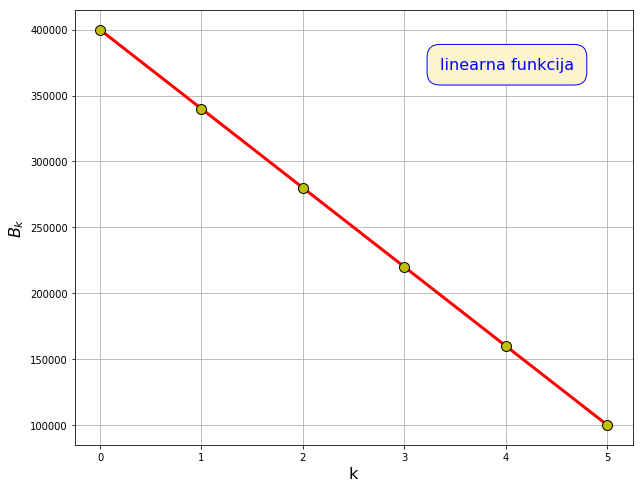

In [17]:
figure(figsize=(10,8))
x=arange(0,5,0.01)
fx= list(map(lambda x: -60000*x+400000, x))
plot(x,fx,c='r',lw=3)
dx=[0,1,2,3,4,5]
dy=list(map(lambda x: -60000*x+400000, dx))
plot(dx,dy,c='y',ls='',marker='o',ms=10,markeredgecolor='k')
text(3.35,370000, "linearna funkcija", color='blue', fontsize=16,
        bbox=dict(facecolor='#FCF3CF', edgecolor='blue', boxstyle='round,pad=0.8'))
xlabel('k',fontsize=16)
ylabel('$B_k$',fontsize=16)
grid(True)

<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>Zadatak</h3>
<p style="line-height:30px;">Oprema čija je cijena $400\,000$ kuna ima životni vijek 5 godina i otpisnu vrijednost $100\,000$ kuna. Napravite amortizacijsku tablicu koristeći metodu sume znamenaka.</p>
</div>
<h3>Rješenje</h3>

In [18]:
amortizacija(400000,100000,5,izlaz='rjecnik',metoda='SZ')

{0: {'R': 0, 'D': 0, 'B': 400000},
 1: {'R': 100000.0, 'D': 100000.0, 'B': 300000.0},
 2: {'R': 80000.0, 'D': 180000.0, 'B': 220000.0},
 3: {'R': 60000.0, 'D': 240000.0, 'B': 160000.0},
 4: {'R': 40000.0, 'D': 280000.0, 'B': 120000.0},
 5: {'R': 20000.0, 'D': 300000.0, 'B': 100000.0}}

In [19]:
amortizacija(400000,100000,5,izlaz='rjecnik',decimale=0,metoda='SZ')

{0: {'R': 0, 'D': 0, 'B': 400000},
 1: {'R': 100000, 'D': 100000, 'B': 300000},
 2: {'R': 80000, 'D': 180000, 'B': 220000},
 3: {'R': 60000, 'D': 240000, 'B': 160000},
 4: {'R': 40000, 'D': 280000, 'B': 120000},
 5: {'R': 20000, 'D': 300000, 'B': 100000}}

In [20]:
amortizacija(400000,100000,5,izlaz='html',metoda='SZ')

In [21]:
amortizacija(400000,100000,5,decimale=0,metoda='SZ')

<h4>slika</h4>
<p>Knjigovodstvena vrijednost kod amortizacije metodom sume znamenaka je kvadratna funkcija vremena.</p>

In [22]:
np.polyfit([0,1,2,3,4,5],[400000,300000,220000,160000,120000,100000],2)

array([  10000., -110000.,  400000.])

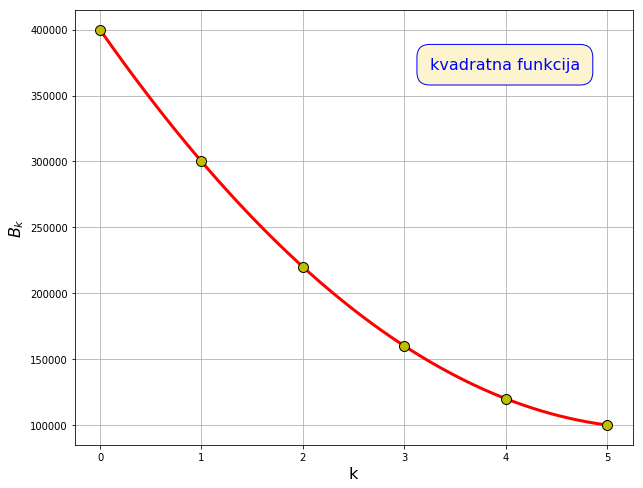

In [23]:
figure(figsize=(10,8))
x=arange(0,5,0.01)
fx= list(map(lambda x: 10000*x**2-110000*x+400000, x))
plot(x,fx,c='r',lw=3)
dx=[0,1,2,3,4,5]
dy=list(map(lambda x: 10000*x**2-110000*x+400000, dx))
plot(dx,dy,c='y',ls='',marker='o',ms=10,markeredgecolor='k')
text(3.25,370000, "kvadratna funkcija", color='blue', fontsize=16,
        bbox=dict(facecolor='#FCF3CF', edgecolor='blue', boxstyle='round,pad=0.8'))
xlabel('k',fontsize=16)
ylabel('$B_k$',fontsize=16)
grid(True)

<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>Zadatak</h3>
<p style="line-height:30px;">Oprema čija je cijena $400\,000$ kuna ima životni vijek 5 godina i otpisnu vrijednost $100\,000$ kuna. Napravite amortizacijsku tablicu koristeći metodu konstantnog postotka.</p>
</div>
<h3>Rješenje</h3>

In [24]:
amortizacija(400000,100000,5,izlaz='rjecnik',metoda='KP')

{0: {'R': 0, 'D': 0, 'B': 400000},
 1: {'R': 96856.69, 'D': 96856.69, 'B': 303143.31},
 2: {'R': 73403.64, 'D': 170260.33, 'B': 229739.67},
 3: {'R': 55629.56, 'D': 225889.89, 'B': 174110.11},
 4: {'R': 42159.32, 'D': 268049.21, 'B': 131950.79},
 5: {'R': 31950.79, 'D': 300000.0, 'B': 100000.0}}

In [25]:
amortizacija(400000,100000,5,metoda='KP')

<h4>slika</h4>
<p>Knjigovodstvena vrijednost kod amortizacije metodom konstantnog postotka je eksponencijalna funkcija vremena.</p>

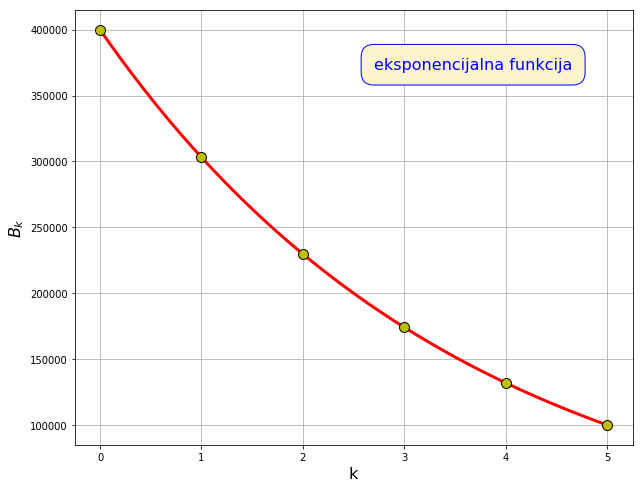

In [26]:
figure(figsize=(10,8))
x=arange(0,5,0.01)
d=100*(1-(100000/400000)**(1/5))
fx= list(map(lambda x: 400000*(1-d/100)**x, x))
plot(x,fx,c='r',lw=3)
dx=[0,1,2,3,4,5]
dy=list(map(lambda x: 400000*(1-d/100)**x, dx))
plot(dx,dy,c='y',ls='',marker='o',ms=10,markeredgecolor='k')
text(2.7,370000, "eksponencijalna funkcija", color='blue', fontsize=16,
        bbox=dict(facecolor='#FCF3CF', edgecolor='blue', boxstyle='round,pad=0.8'))
xlabel('k',fontsize=16)
ylabel('$B_k$',fontsize=16)
grid(True)

<h3>Usporedba vremenskih metoda amortizacije</h3>
<p>Odnos knjigovodstvenih vrijednosti kod metode sume znamenaka i metode konstantnog postotka bitno ovisi i o početnim podacima.</p>
<h4>$C=400\,000,\quad S=100\,000,\quad n=5$</h4>

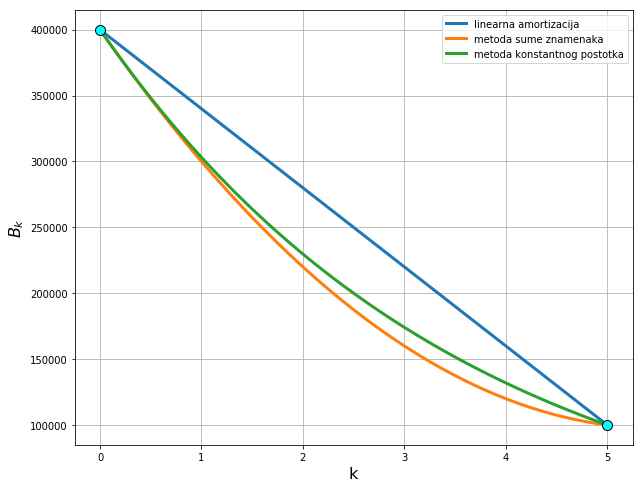

In [27]:
figure(figsize=(10,8))
x=arange(0,5,0.01)
LINx= list(map(lambda x: -60000*x+400000, x))
SZx= list(map(lambda x: 10000*x**2-110000*x+400000, x))
KPx= list(map(lambda x: 400000*(1-d/100)**x, x))
plot(x,LINx,lw=3,label='linearna amortizacija')
plot(x,SZx,lw=3,label='metoda sume znamenaka')
plot(x,KPx,lw=3,label='metoda konstantnog postotka')
dx=[0,5]
dy=[400000,100000]
plot(dx,dy,c='cyan',ls='',marker='o',ms=10,markeredgecolor='k')
xlabel('k',fontsize=16)
ylabel('$B_k$',fontsize=16)
legend()
grid(True)

<h4>$C=400\,000,\quad S=50\,000,\quad n=5$</h4>

In [28]:
amortizacija(400000,50000,5,metoda='LIN')

In [29]:
amortizacija(400000,50000,5,metoda='SZ')

In [30]:
amortizacija(400000,50000,5,metoda='KP')

In [31]:
kl=np.polyfit([0,1,2,3,4,5],[400000,330000,260000,190000,120000,50000],1)
kl

array([-70000., 400000.])

In [32]:
ksz=np.polyfit([0,1,2,3,4,5],[400000,283333.33,190000,120000,73333.33,50000],2)
ksz

array([  11666.66678571, -128333.33392857,  399999.99928571])

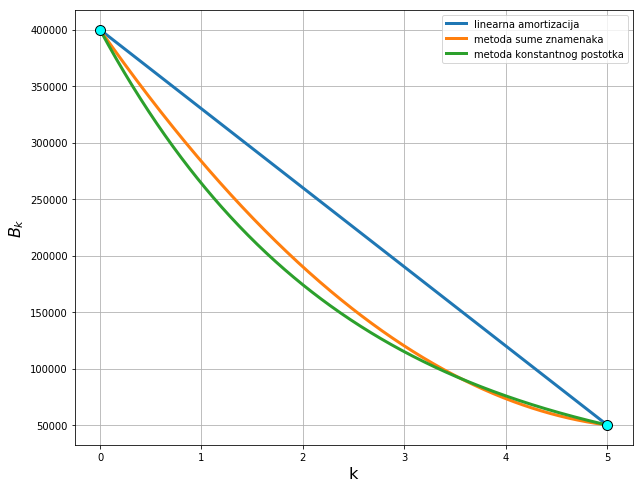

In [33]:
figure(figsize=(10,8))
x=arange(0,5,0.01)
d=100*(1-(50000/400000)**(1/5))
LINx= list(map(lambda x: kl[0]*x+kl[1], x))
SZx= list(map(lambda x: ksz[0]*x**2+ksz[1]*x+ksz[2], x))
KPx= list(map(lambda x: 400000*(1-d/100)**x, x))
plot(x,LINx,lw=3,label='linearna amortizacija')
plot(x,SZx,lw=3,label='metoda sume znamenaka')
plot(x,KPx,lw=3,label='metoda konstantnog postotka')
dx=[0,5]
dy=[400000,50000]
plot(dx,dy,c='cyan',ls='',marker='o',ms=10,markeredgecolor='k')
xlabel('k',fontsize=16)
ylabel('$B_k$',fontsize=16)
legend()
grid(True)

<h2>Funkcionalna amortizacija</h2>

<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>Zadatak</h3>
<p style="line-height:30px;">Izradite amortizacijsku osnovicu za stroj čija je vrijednost $60\,000$ kuna, a otpisna $8\,000$ kuna. Predviđeni vijek trajanja stroja je 4 godine, a tijekom tih godina njegov je učinak po broju proizvoda dan u donjoj tablici.
<p style="text-align: center;">
<table style="border-collapse:collapse;border-spacing:0;">
  <tr>
    <th style="font-weight:bold;background-color:#E6E6FA;text-align:center;padding:10px 5px;">godina</th>
    <th style="text-align:center;">1.</th>
    <th style="text-align:center;">2.</th>
    <th style="text-align:center;">3.</th>
    <th style="text-align:center;">4.</th>
  </tr>
  <tr>
    <td style="font-weight:bold;background-color:#E6E6FA;text-align:center;padding:10px 5px;">broj proizvoda</td>
    <td style="text-align:center;padding:10px 10px;">4000</td>
    <td style="text-align:center;padding:10px 10px;">3500</td>
    <td style="text-align:center;padding:10px 10px;">2900</td>
    <td style="text-align:center;padding:10px 10px;">2600</td>
  </tr>
</table>
</p></p>
</div>
<h3>Rješenje</h3>

In [34]:
funkcionalna_amortizacija(60000,8000,4,[4000,3500,2900,2600])

In [35]:
funkcionalna_amortizacija(60000,8000,4,[4000,3500,2900,2600],decimale=0)

In [36]:
funkcionalna_amortizacija(60000,8000,4,[4000,3500,2900,2600],izlaz='rjecnik')

{0: {'p': 0, 'R': 0, 'D': 0, 'B': 60000},
 1: {'p': 4000, 'R': 16000.0, 'D': 16000.0, 'B': 44000.0},
 2: {'p': 3500, 'R': 14000.0, 'D': 30000.0, 'B': 30000.0},
 3: {'p': 2900, 'R': 11600.0, 'D': 41600.0, 'B': 18400.0},
 4: {'p': 2600, 'R': 10400.0, 'D': 52000.0, 'B': 8000.0}}

In [37]:
funkcionalna_amortizacija(60000,8000,4,[4000,3500,2900,2600],izlaz='rjecnik',decimale=0)

{0: {'p': 0, 'R': 0, 'D': 0, 'B': 60000},
 1: {'p': 4000, 'R': 16000, 'D': 16000, 'B': 44000},
 2: {'p': 3500, 'R': 14000, 'D': 30000, 'B': 30000},
 3: {'p': 2900, 'R': 11600, 'D': 41600, 'B': 18400},
 4: {'p': 2600, 'R': 10400, 'D': 52000, 'B': 8000}}

<h4>slika</h4>
<p style="line-height:25px;">Funkcija knjigovodstvene vrijednosti ovisno o vremenu aproksimirana je linearnim splajnom (po dijelovima linearnom funkcijom). Naravno, možemo dobivene diskretne podatke interpolirati i nekom drugom funkcijom. Sve ovisi o konkretnom problemu i našem iskustvu s konkretnim realnim problemom na temelju kojeg biramo što je moguće precizniji model za kontinuirani slučaj.</p>
<p style="line-height:25px;">Površina ispod linearnog splajna na segmentu $[k-1,k]$ zorno nam aproksimira intenzitet trošenja dobra u $k$-toj godini za $k\in\{1,2,3,4\}$.</p>

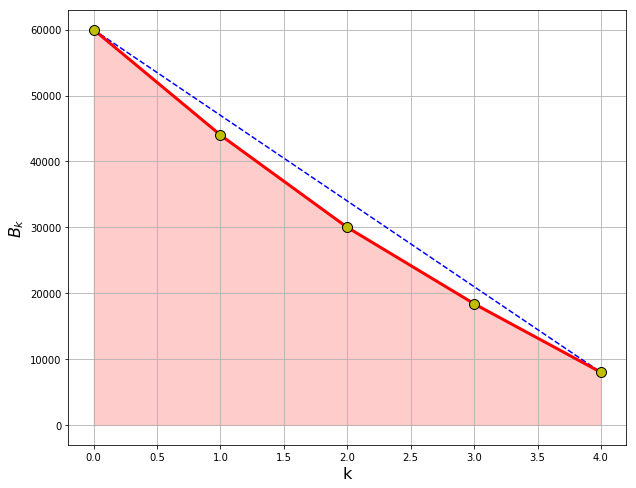

In [38]:
figure(figsize=(10,8))
x=arange(0,4.01,0.01)
fx= list(map(lambda x: np.interp(x,[0,1,2,3,4],[60000,44000,30000,18400,8000]), x))
plot([0,4],[60000,8000],c='b',ls='--')
fill_between(x,0,fx,alpha=0.2,color='r')
plot(x,fx,c='r',lw=3)
dx=[0,1,2,3,4]
dy=[60000,44000,30000,18400,8000]
plot(dx,dy,c='y',ls='',marker='o',ms=10,markeredgecolor='k')
xlabel('k',fontsize=16)
ylabel('$B_k$',fontsize=16)
grid(True)